In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import lmfit as lm

plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [2]:
# import data from text file
import pandas as pds


damic_data = pds.read_csv("data/DAMIC_EXCESS_sigvE_good_update.txt", skiprows=1, \
                         names=['Energy', 'Sig'], \
                         delim_whitespace=False
                     )

print (damic_data.head(10))

E = np.asarray(damic_data["Energy"], dtype=np.float32)

print (E)

   Energy     Sig
0  0.0681  0.3324
1  0.0571  0.5792
2  0.0715  0.6575
3  0.0936  0.7235
4  0.0914  0.5451
5  0.1102  0.3667
6  0.1297  0.6479
7  0.1395  0.7603
8  0.1479  0.6992
9  0.1623  0.7187
[0.0681 0.0571 0.0715 0.0936 0.0914 0.1102 0.1297 0.1395 0.1479 0.1623
 0.1995 0.2178 0.2315 0.2583 0.3039 0.5218 0.6258 0.712  0.8869 0.8401]


In [3]:
#make histos (counts per day)

ebins = np.linspace(0,1,21)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(E,bins=ebins)

#get the correct errors
error1 = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28]
error2 = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30]
ntot = n
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=13:
        ntot_plus[i] = error2[ncount]-ncount
        ntot_minus[i] = ncount-error1[ncount]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)

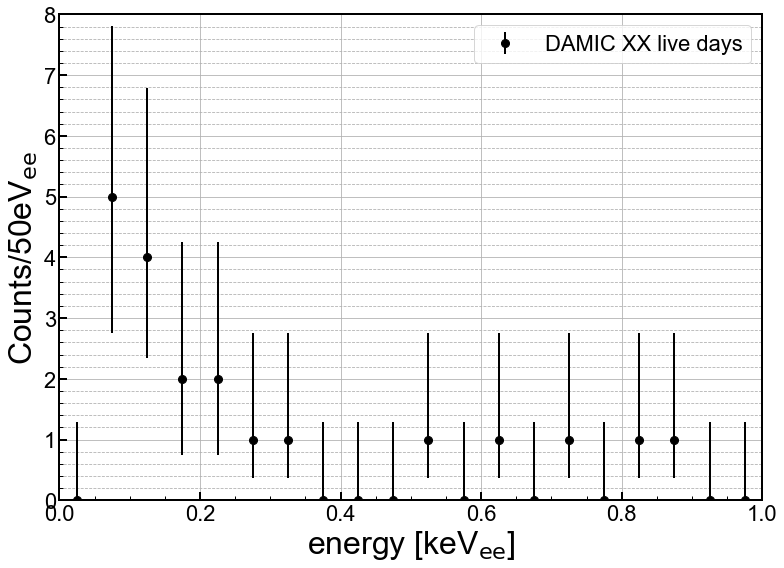

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


ax1.errorbar(xcq,n,yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='DAMIC XX live days', linewidth=2)



ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
print(ebins)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
print(xcq)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]


In [7]:
#First run Lindhard
import pickle as pkl
import R68_load as r68
import R68_efficiencies as eff
meas=r68.load_measured()
import R68_spec_tools as spec

Emax = 2000 #eVee
Ebins=np.linspace(0,Emax,201)
Ebins_ctr=(Ebins[:-1]+Ebins[1:])/2
Efit_min=50#[eVee]
Efit_max=1750#[eVee]
spec_bounds=(np.digitize(Efit_min,Ebins)-1,np.digitize(Efit_max,Ebins)-1)

Ebins_ctr[slice(*spec_bounds)].shape

cthresh=Ebins_ctr>=50 #Only plot hists above threshold

c_stat,dc_stat=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=False, doBurstLeaksyst=False, output='counts')
c_syst,dc_syst=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=False, output='counts')
c_syst2,dc_syst2=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=True, output='counts')

r_stat,dr_stat=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=False, doBurstLeaksyst=False, output='reco-rate')
r_syst,dr_syst=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=False, output='reco-rate')
r_syst2,dr_syst2=spec.doBkgSub(r68.load_measured(verbose=False), Ebins, Efit_min, Efit_max, doEffsyst=True, doBurstLeaksyst=True, output='reco-rate')

/Users/villaa/Research/thermal-flux_paper2023/DAMIC/../python/R68_spec_tools.py:55: RuntimeWarning: divide by zero encountered in divide
  (eff.dcutEffFit_bkg(Ebins_ctr)/eff.cutEffFit_bkg(Ebins_ctr))**2 +\
/Users/villaa/Research/thermal-flux_paper2023/DAMIC/../python/R68_spec_tools.py:80: RuntimeWarning: divide by zero encountered in divide
  N_bkg_scaled=N_meas_Bkg*TE_PuBe/TE_Bkg
/Users/villaa/Research/thermal-flux_paper2023/DAMIC/../python/R68_spec_tools.py:96: RuntimeWarning: divide by zero encountered in divide
  doEffsyst*(eff.dcutEffFit_bkg(Ebins_ctr)/eff.cutEffFit_bkg(Ebins_ctr))**2)
/Users/villaa/Research/thermal-flux_paper2023/DAMIC/../python/R68_spec_tools.py:96: RuntimeWarning: invalid value encountered in multiply
  doEffsyst*(eff.dcutEffFit_bkg(Ebins_ctr)/eff.cutEffFit_bkg(Ebins_ctr))**2)
/Users/villaa/Research/thermal-flux_paper2023/DAMIC/../python/R68_spec_tools.py:100: RuntimeWarning: invalid value encountered in multiply
  doEffsyst*(dTE_Bkg/TE_Bkg)**2 )
/Users/villaa/

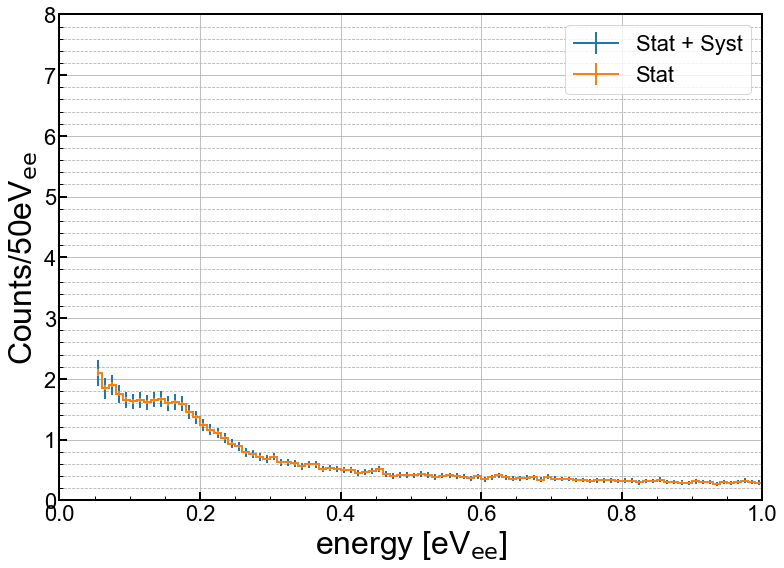

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(11.0,8.0),sharex=True)
ax1 = axes



#print(estring)


#axs1.errorbar(Ebin_ctr[Ebin_ctr>50],RQss[1]['N_meas'][Ebin_ctr>50],(RQss[1]['dN_meas'].T[Ebin_ctr>50]).T,
#                ecolor='k', marker='o',markersize=8,color='k', linestyle='none',label='Measured',zorder=5,linewidth=3)


line_r_syst=ax1.errorbar(Ebins_ctr[cthresh]/1000,60*r_syst2[cthresh],yerr=(60*dr_syst2[::-1])[:,cthresh],drawstyle = 'steps-mid', linewidth=2, label='Stat + Syst')
line_r_stat=ax1.errorbar(Ebins_ctr[cthresh]/1000,60*r_stat[cthresh],yerr=60*dr_stat[::-1][:,cthresh],drawstyle = 'steps-mid', linewidth=2, label='Stat')

ymin = 0
ymax = 8

blue = '#118DFA'



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [eV$_{\mathrm{ee}}$]')
ax1.set_ylabel('Counts/50eV$_{\mathrm{ee}}$')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()